### Plasma comparison ###

In [1]:
from tardis.simulation import Simulation
from tardis.io.configuration.config_reader import Configuration
from IPython.display import FileLinks

/Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


[py.warnings         ][WARNING]  /Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
 (warnings.py:99)
[py.warnings         ][WARNING]  /Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
 (warnings.py:99)


**The example tardis_example can be downloaded here**

[tardis_example.yml](tardis_example.yml)


In [2]:
config = Configuration.from_yaml('tardis_example.yml')
sim = Simulation.from_config(config)

[py.warnings         ][WARNING]  /Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/site-packages/astropy/units/quantity.py:1067: AstropyDeprecationWarning: The truth value of a Quantity is ambiguous. In the future this will raise a ValueError.
  AstropyDeprecationWarning)
 (warnings.py:99)
[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:74)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /Users/wkerzend/projects/tardis/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:29)
[py.warnings         ][WARNING]  /Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (yield from self.run_code(code, result)):
 (warnings.py:99)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 an

#### Accessing the plasma states ####
In this example, we are accessing Si and also the unionized number density (0)

In [33]:
# All Si ionization states
sim.plasma.ion_number_density.loc[14]

,0
ion_number,
0,3.406539e-13
1,9.307653e-04
2,2.293418e+04
3,2.468681e+08
4,8.681218e+08
5,0.000000e+00
6,0.000000e+00
7,0.000000e+00
8,0.000000e+00


In [34]:
# Normalizing by si number density
sim.plasma.ion_number_density.loc[14] / sim.plasma.number_density.loc[14]

,0
ion_number,
0,3.055157e-22
1,8.347575e-13
2,2.056853e-05
3,2.214038e-01
4,7.785756e-01
5,0.000000e+00
6,0.000000e+00
7,0.000000e+00
8,0.000000e+00


In [35]:
# Accessing the first ionization state

sim.plasma.ion_number_density.loc[14, 1]

0    0.000931
Name: (14, 1), dtype: float64

In [5]:
sim.plasma.update(density=[1e-13])

In [6]:
sim.plasma.ion_number_density

0
atomic_number ion_number              
8             0           1.288175e+04
              1           7.151416e+08
              2           1.598774e+03
              3           6.741210e-14
              4           0.000000e+00
              5           0.000000e+00
              6           0.000000e+00
              7           0.000000e+00
              8           0.000000e+00
12            0           3.800017e-05
              1           6.545794e+03
              2           7.432405e+07
              3           0.000000e+00
              4           0.000000e+00
              5           0.000000e+00
              6           0.000000e+00
              7           0.000000e+00
              8           0.000000e+00
              9           0.000000e+00
              10          0.000000e+00
              11          0.000000e+00
              12          0.000000e+00
14            0           3.172104e-02
              1           1.332867e+06
              2           1.113664e+09
              3           1.601707e+04
              4           5.800053e-08
              5           0.000000e+00
              6           0.000000e+00
              7           0.000000e+00
...                                ...
18            10          0.000000e+00
              11          0.000000e+00
              12          0.000000e+00
              13          0.000000e+00
              14          0.000000e+00
              15          0.000000e+00
              16          0.000000e+00
              17          0.000000e+00
              18          0.000000e+00
20            0           2.144981e-07
              1           1.601330e+02
              2           4.507800e+07
              3           1.833649e-06
              4           0.000000e+00
              5           0.000000e+00
              6           0.000000e+00
              7           0.000000e+00
              8           0.000000e+00
              9           0.000000e+00
              10          0.000000e+00
              11          0.000000e+00
              12          0.000000e+00
              13          0.000000e+00
              14          0.000000e+00
              15          0.000000e+00
              16          0.000000e+00
              17          0.000000e+00
              18          0.000000e+00
              19          0.000000e+00
              20          0.000000e+00

[94 rows x 1 columns]

#### Updating the plasma state ####

It is possible to update the plasma state with different temperatures or dilution factors (as well as different densities.). We are updating the radiative temperatures and plotting the evolution of the ionization state

In [36]:
si_ionization_state = None
for cur_t_rad in range(1000, 20000, 100):
    sim.plasma.update(t_rad=[cur_t_rad])
    if si_ionization_state is None:
        si_ionization_state = sim.plasma.ion_number_density.loc[14].copy()
        si_ionization_state.columns = [cur_t_rad]
    else:
        si_ionization_state[cur_t_rad] = sim.plasma.ion_number_density.loc[14].copy()

[py.warnings         ][WARNING]  /Users/wkerzend/python/tardis/tardis/plasma/properties/ion_population.py:63: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  partition_function.index].dropna())
 (warnings.py:99)


Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Number density [1/cm$^3$]')

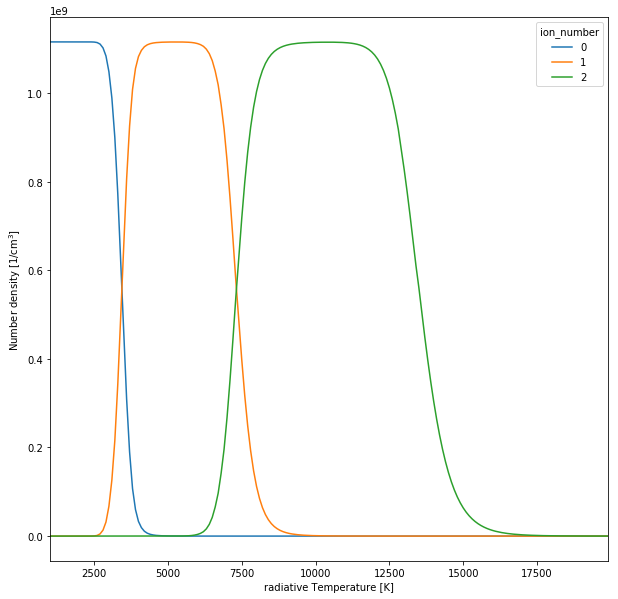

In [37]:
%pylab inline

fig = figure(0, figsize=(10, 10))
ax = fig.add_subplot(111)
si_ionization_state.T.iloc[:, :3].plot(ax=ax)
xlabel('radiative Temperature [K]')
ylabel('Number density [1/cm$^3$]')